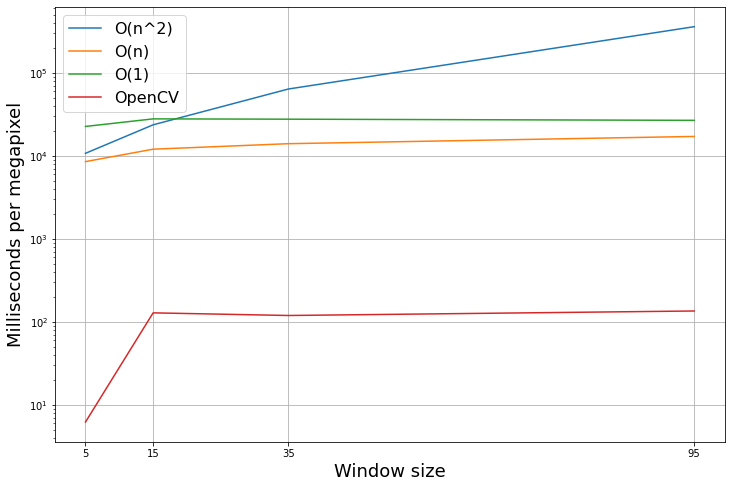

In [35]:
import matplotlib.pyplot as plt

quadratic_time = [10_771.4, 23_763, 64_195.7, 362117]
linear_time = [8_554.85, 12_081.2, 14_073, 17_210.1]
constant_time = [22_714.6, 28_022.7, 27_781.2, 26_908.5]
window_sizes = [5, 15, 35, 95]

fig = plt.figure(figsize=(12, 8))

plt.plot(window_sizes, quadratic_time, label="O(n^2)")
plt.plot(window_sizes, linear_time, label="O(n)")
plt.plot(window_sizes, constant_time, label="O(1)")
plt.plot(window_sizes, cv2_times, label="OpenCV")

plt.xticks(window_sizes)

plt.xlabel("Window size", fontsize=18)
plt.ylabel("Milliseconds per megapixel", fontsize=18)

plt.yscale("log")

plt.grid()
plt.legend(fontsize=16)
plt.show()

In [12]:
import cv2

In [21]:
image = cv2.imread("./resources/sample.bmp")
result_image = cv2.medianBlur(image, 15)
cv2.imwrite("./resources/cv2_result.bmp", result_image)

True

In [33]:
import timeit

cv2_times = []
for window_size in window_sizes:
    time =  %timeit -o cv2.medianBlur(image, window_size)
    
    milliseconds = time.average * 1000
    milliseconds_per_pixel = milliseconds / (image.shape[0] * image.shape[1])
    milliseconds_per_megapixel = milliseconds_per_pixel * 1_000_000
    
    cv2_times.append(milliseconds_per_megapixel)

53.7 ms ± 3.83 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.11 s ± 85.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.03 s ± 71.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.17 s ± 38.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [34]:
cv2_times

[6.206957114841227, 128.5472693327466, 119.45551412841864, 135.38770528421824]

In [25]:
time = %timeit -o cv2.medianBlur(image, window_size)

1.14 s ± 102 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [30]:
image.shape

(2073, 4176, 3)

In [32]:
milliseconds_per_megapixel

131.40088302678288